In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

##Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings

##Data Cleaning

In [ ]:
d = pd.read_csv(url, header  = None)

In [ ]:
#Naming the columns
d.columns = ["symboling","normalized losses","make","fuel type","aspiration", "num of doors", "body style", "drive wheels","engine location","wheel base", "length","width","height","curb weight", "engine type", "num of cylinders", "engine size","fuel system","bore","stroke","compression ratio","horsepower", "peak rpm","city mpg", "highway mpg","price"]

In [ ]:
#Exploring the data
d.head()

,symboling,normalized losses,make,fuel type,aspiration,num of doors,body style,drive wheels,engine location,wheel base,...,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
d.shape

(205, 26)

In [ ]:
d.describe(include = "all")

,symboling,normalized losses,make,fuel type,aspiration,num of doors,body style,drive wheels,engine location,wheel base,...,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [ ]:
#To replace existing string value "?" with null values so as to handle null values
df = d.replace("?", np.nan)
df.head()
#df.head() shows that all "?" replaced with Nan.

,symboling,normalized losses,make,fuel type,aspiration,num of doors,body style,drive wheels,engine location,wheel base,...,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##Correcting Datatypes

In [ ]:
#To understand existing datatypes
df.dtypes

,0
symboling,int64
normalized losses,object
make,object
fuel type,object
aspiration,object
num of doors,object
body style,object
drive wheels,object
engine location,object
wheel base,float64


In [ ]:
#To compare the type of data in columns with their existing datatypes from above cell
df.head()

,symboling,normalized losses,make,fuel type,aspiration,num of doors,body style,drive wheels,engine location,wheel base,...,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
#Using .astpe() to correct datatypes of columns with numerical values but "object" datatype
df[["normalized losses", "bore", "stroke", "horsepower", "peak rpm", "price"]] = df[["normalized losses", "bore", "stroke", "horsepower", "peak rpm", "price"]].astype("float")

In [ ]:
#Corrected datatypes
df.dtypes

,0
symboling,int64
normalized losses,float64
make,object
fuel type,object
aspiration,object
num of doors,object
body style,object
drive wheels,object
engine location,object
wheel base,float64


##Dealing with Null Values

In [ ]:
#To identify the columns containing null values and number of null values sorted from highest to lowest
col = df.isnull().sum().sort_values(ascending = False).reset_index()

In [ ]:
col

,index,0
0,normalized losses,41
1,price,4
2,stroke,4
3,bore,4
4,peak rpm,2
5,num of doors,2
6,horsepower,2
7,engine type,0
8,highway mpg,0
9,city mpg,0


In [ ]:
col.columns = ["columns", "null values"]

In [ ]:
#To display only those columns that contain null values and filter columns with 0 null values.
nd = col[col["null values"] > 0]

In [ ]:
nd

,columns,null values
0,normalized losses,41
1,price,4
2,stroke,4
3,bore,4
4,peak rpm,2
5,num of doors,2
6,horsepower,2


In [ ]:
#To replace null values with mean of the column, we filter out columns "num of doors" and "price" to obtain a list of numerical columns
ndf = list(nd["columns"][nd["columns"] != "num of doors"][nd["columns"] != "price"])

#####Reasons we specifically filter out "num of doors" and "price":

1.   The "num of doors" column is categorical and has an object data type, so its null values cannot be replaced with the mean.
2.   Since "price" is our target variable, we do not want to modify any values in this column, even with a mean. Therefore, we will simply drop the rows that contain null values.




In [ ]:
#List containing names of numerical columns whose null values will be replaced with thier mean.
ndf

['normalized losses', 'stroke', 'bore', 'peak rpm', 'horsepower']

In [ ]:
#Using lambda to apply the replace() function to all columns
df[ndf] = df[ndf].apply(lambda x : x.replace(np.nan, x.mean()))

In [ ]:
#Dsiplaying "num of doors"
df["num of doors"]

,num of doors
0,two
1,two
2,two
3,four
4,four
...,...
200,four
201,four
202,four
203,four


In [ ]:
#Replacing null values in "num of doors" with it's mode.
mode = df["num of doors"].value_counts().idxmax()
df["num of doors"].replace(np.nan, mode, inplace = True)

In [ ]:
#Droping rows containing null values from "price"
df.dropna(subset = "price", axis = 0, inplace = True)

In [ ]:
#Resetting the index after dropping rows with null values.
df.reset_index(drop = True, inplace = True)

In [ ]:
#New shape of the dataframe
df.shape

(201, 26)

In [ ]:
#We get a dataframe we no null values
df.isnull().sum()

,0
symboling,0
normalized losses,0
make,0
fuel type,0
aspiration,0
num of doors,0
body style,0
drive wheels,0
engine location,0
wheel base,0


## Feature Selection using Pearson Correlation Coefficient


In [ ]:
#Filtering the output to display correlations with respect to the "price" column.
dc = df.corr(numeric_only = True)["price"]
dc

,price
symboling,-0.082391
normalized losses,0.133999
wheel base,0.584642
length,0.690628
width,0.751265
height,0.135486
curb weight,0.834415
engine size,0.872335
bore,0.543155
stroke,0.082269


In [ ]:
#Further filtering to display only those columns with a strong positive correlation with price.
pc = dc[dc > 0.7]
pc

,price
width,0.751265
curb weight,0.834415
engine size,0.872335
horsepower,0.809575
price,1.000000


In [ ]:
#Saving column names with strong positive correlation to "price" in a list for later use.
pcl = list(pc.index)
pcl

['width', 'curb weight', 'engine size', 'horsepower', 'price']

<Axes: xlabel='width', ylabel='price'>

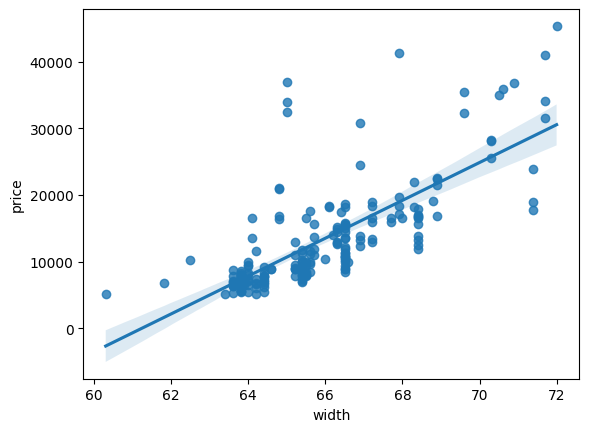

In [ ]:
#The plot shows a Positive Linear Relationship for "width" column.
sns.regplot(data = df, x = "width", y = "price")

<Axes: xlabel='curb weight', ylabel='price'>

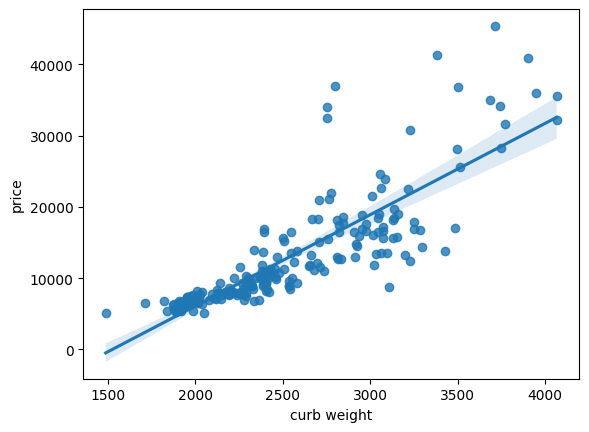

In [ ]:
#The plot shows a Positive Linear Relationship for "curb weight" column.
sns.regplot(data = df, x = "curb weight", y = "price")

<Axes: xlabel='engine size', ylabel='price'>

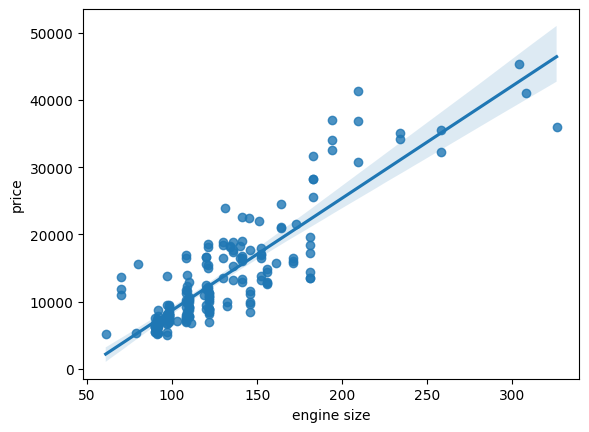

In [ ]:
#The plot shows a Positive Linear Relationship for "engine size" column.
sns.regplot(data = df, x = "engine size", y = "price")

<Axes: xlabel='horsepower', ylabel='price'>

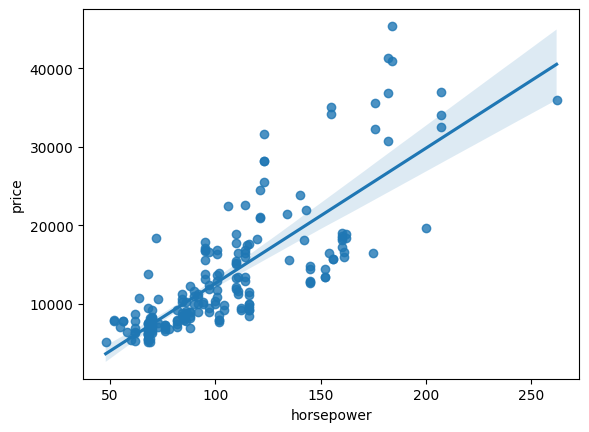

In [ ]:
#The plot shows a Positive Linear Relationship for "horsepower" column.
sns.regplot(data = df, x = "horsepower", y = "price")

In [ ]:
#Displaying columns with a Moderate - Strong Negative Correlation with "price"
nc = dc[dc < -0.65 ]
nc

,price
city mpg,-0.686571
highway mpg,-0.704692


In [ ]:
#Saving column names having Negative Correlation with "price" in a list for later use.
ncl = list(nc.index)
ncl

['city mpg', 'highway mpg']

<Axes: xlabel='city mpg', ylabel='price'>

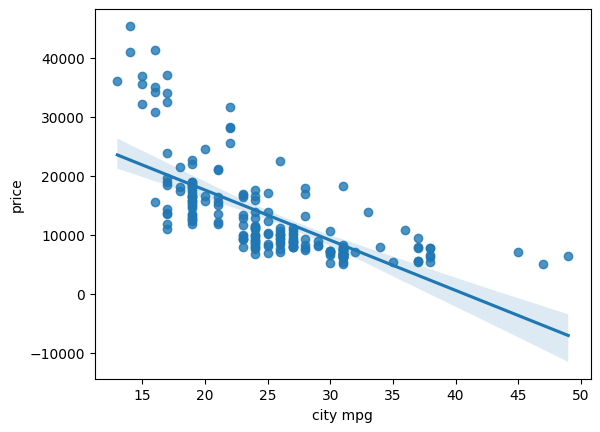

In [ ]:
#The plot shows a Negative Linear Relationship for "city mpg" column.
sns.regplot(data = df, x = "city mpg", y = "price")

<Axes: xlabel='highway mpg', ylabel='price'>

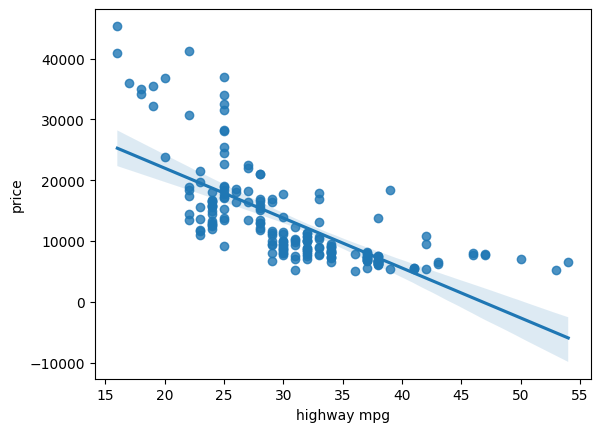

In [ ]:
#The plot shows a Negative Linear Relationship for "city mpg" column.
sns.regplot(data = df, x = "highway mpg", y = "price")

Looking at the above plots, Linear Regression might be a good fit for predicting prices using these variables

In [ ]:
#List with column names Positively Correlated with "price".
pcl

['width', 'curb weight', 'engine size', 'horsepower', 'price']

In [ ]:
#List with column names Negatively Correlated with "price".
ncl

['city mpg', 'highway mpg']

In [ ]:
#We add the lists together to obtain a list with all column names to be used as independent variables during Multiple Linear Regression.
#We exclude "price" since "price" is our target variable.
cols = pcl[0:-1] + ncl
cols
# cols is the list with all column names to be used as input in Linear Regression model.

['width',
 'curb weight',
 'engine size',
 'horsepower',
 'city mpg',
 'highway mpg']

##Linear Regression Analysis

In [ ]:
#Saving only numeric columns from the dataframe
dfnu = df._get_numeric_data()
dfnu.head()

,symboling,normalized losses,wheel base,length,width,height,curb weight,engine size,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
#Preparing independent variable columns
x = dfnu.drop("price", axis = 1)

In [ ]:
#Preparing target variable column
y = dfnu["price"]

In [ ]:
#Dividing the numeric dataframe into training data and testing data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.45, random_state = 0)

In [ ]:
#Preparing training and testing data to include only columns Correlated with "price".
#These will be our inputs for Multiple Linear Regression.
mxtrain = xtrain[cols].astype("float")
mxtest = xtest[cols].astype("float")

In [ ]:
#Creating a Linear Regression object
lr = LinearRegression()
lr

LinearRegression()

In [ ]:
#Fitting training data and predicting "price" using test data.
lr.fit(mxtrain,ytrain)
yp = lr.predict(mxtest)

In [ ]:
#Initial accuracy check on the Linear Regression model using r2_score.
r2_score(ytest, yp)

0.7740906198963052

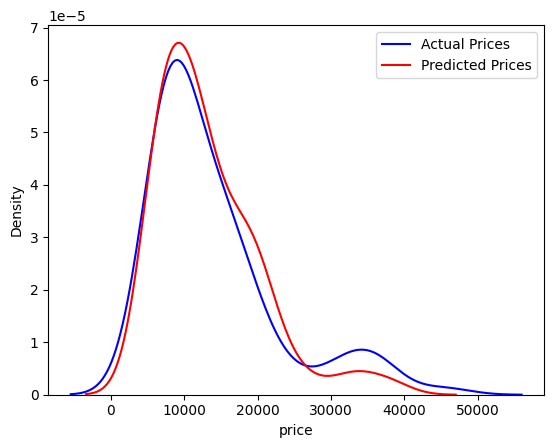

In [ ]:
#Visual comparison of values predicted by the Linear Regression model and actual values.
#We do this by comparing Predicted "price" from the model with Actual "price" from our test data.
warnings.filterwarnings("ignore")
ax = sns.distplot(ytest, hist = False, label = "Actual Values", color = "blue")
sns.distplot(yp, hist = False, label = "Predicted Values", color = "red")

plt.legend(["Actual Prices", "Predicted Prices"])
plt.show()
